# Project description

Prepare a prototype of a machine learning model for Zyfra. The company develops efficiency solutions for heavy industry.


The model should predict the amount of gold recovered from gold ore. You have the data on extraction and purification.


The model will help to optimize the production and eliminate unprofitable parameters.


You need to:

1. Prepare the data
1. Perform data analysis
1. Develop and train a model.



**Process and names**

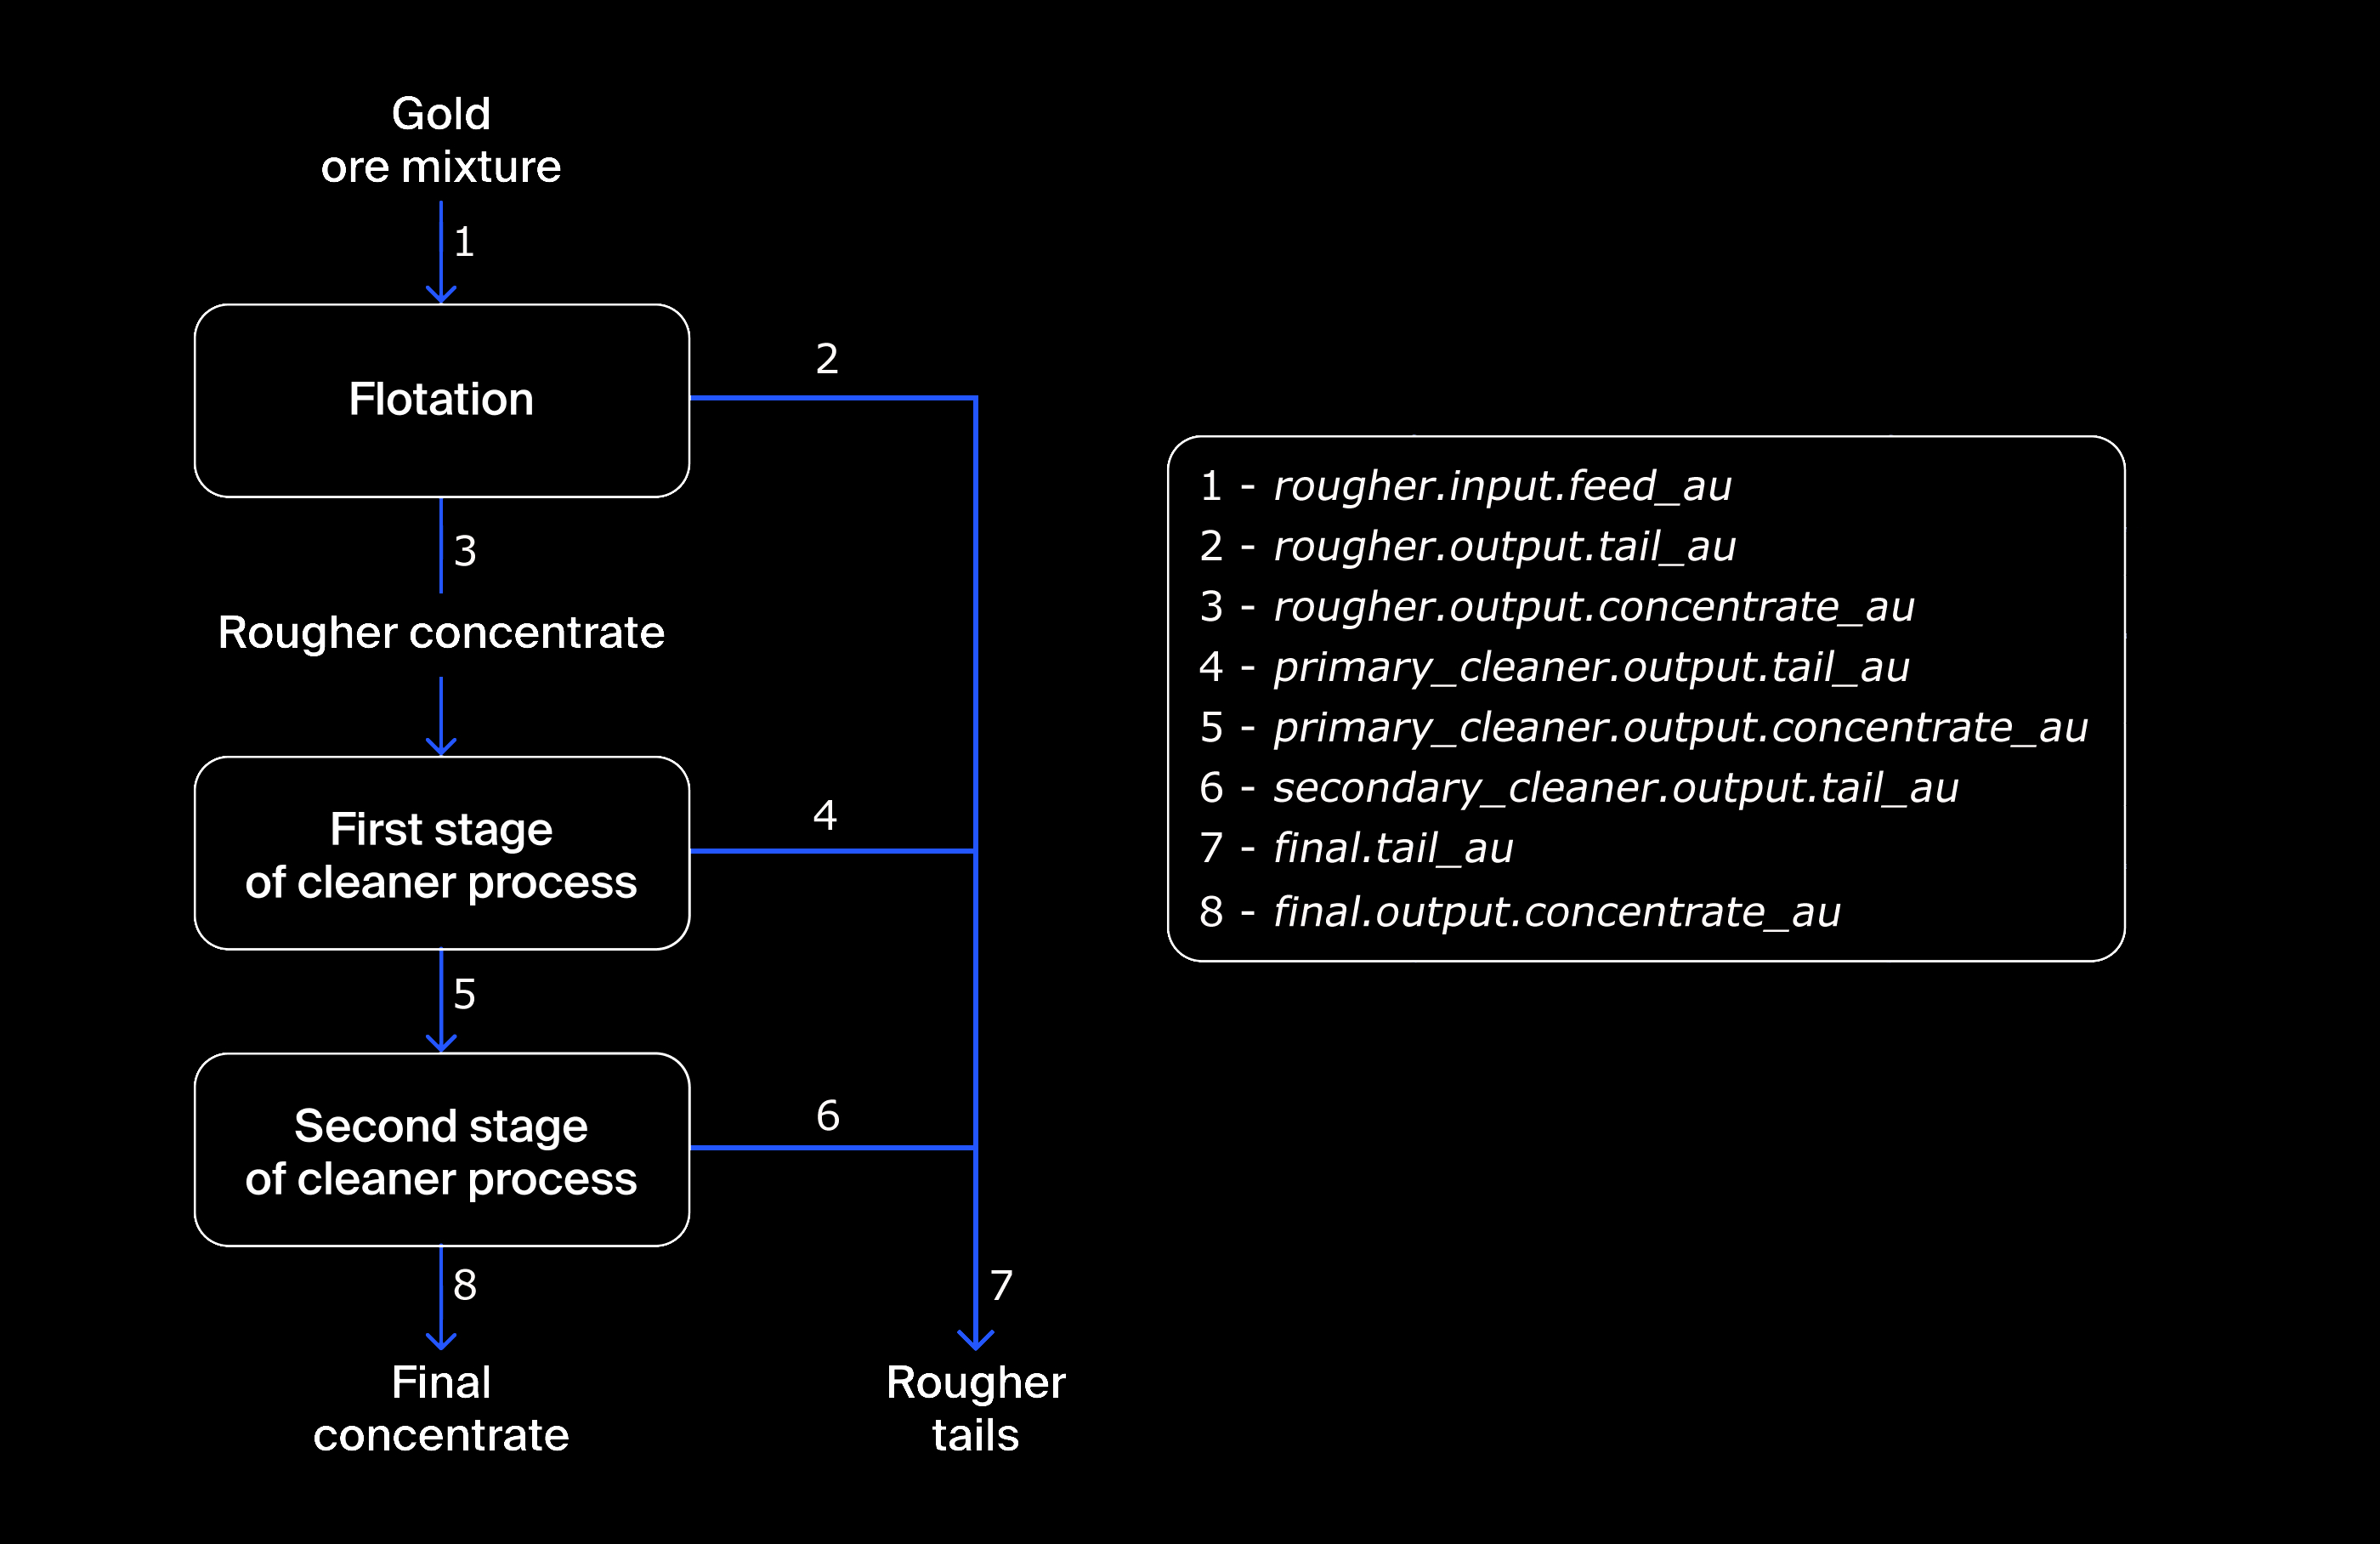

## Download and prepare the data.

In [18]:
# Loading all the libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.dummy import DummyRegressor

In [19]:
# Loading data

#Train data:
train_df = pd.read_csv('gold_recovery_train.csv', parse_dates = ['date'])

test_df = pd.read_csv('gold_recovery_test.csv', parse_dates = ['date'])

source_df = pd.read_csv('gold_recovery_full.csv', parse_dates = ['date'])

In [20]:
train_df.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [21]:
# Basic information of the training set
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                16860 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         16788 non-null  float64       
 2   final.output.concentrate_pb                         16788 non-null  float64       
 3   final.output.concentrate_sol                        16490 non-null  float64       
 4   final.output.concentrate_au                         16789 non-null  float64       
 5   final.output.recovery                               15339 non-null  float64       
 6   final.output.tail_ag                                16794 non-null  float64       
 7   final.output.tail_pb                                16677 non-null  float64       
 8   final.

##  Check that recovery is calculated correctly.


$$Recovery = \frac{C*(F-T)}{F*(C-T)}* 100\%$$




* **C** — share of gold in the concentrate right after flotation (for finding the rougher concentrate recovery)/after purification (for finding the final concentrate recovery)
* **F** — share of gold in the feed before flotation (for finding the rougher concentrate recovery)/in the concentrate right after flotation (for finding the final concentrate recovery)
* **T** — share of gold in the rougher tails right after flotation (for finding the rougher concentrate recovery)/after purification (for finding the final concentrate recovery)

### Using the training set, calculate recovery for the rougher.output.recovery feature

In [22]:
# Recovery equation
def calc_recovery(C, F, T):
    return (C * (F-T)) / (F * (C-T)) * 100

# Removing missing values for the calculations
train_temp = train_df[['rougher.output.concentrate_au','rougher.input.feed_au','rougher.output.tail_au','rougher.output.recovery' ]].dropna()

# Calculate rougher recovery
self_calculated_recovery = calc_recovery(train_temp['rougher.output.concentrate_au'], train_temp['rougher.input.feed_au'], train_temp['rougher.output.tail_au'])                                

In [23]:
self_calculated_recovery.head()

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
dtype: float64

In [24]:
train_temp['rougher.output.recovery'].head()

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
Name: rougher.output.recovery, dtype: float64

### Find the MAE between your calculations and the feature values

In [25]:
MAE = mean_absolute_error(train_temp['rougher.output.recovery'], self_calculated_recovery)
print(f"Mae between my calculations and the feature values: {MAE:}")

Mae between my calculations and the feature values: 9.303415616264301e-15


### Conclusion:
* The MAE is very closed to zero,  the feature values are correct.

## Analyze the features not available in the test set. What are these parameters? What is their type?

In [26]:
test_df.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [27]:
# Basic information on the test set
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        5856 non-null   datetime64[ns]
 1   primary_cleaner.input.sulfate               5554 non-null   float64       
 2   primary_cleaner.input.depressant            5572 non-null   float64       
 3   primary_cleaner.input.feed_size             5856 non-null   float64       
 4   primary_cleaner.input.xanthate              5690 non-null   float64       
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64       
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64       
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64       
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64       
 9   primary_

In [28]:
not_in_test = set(train_df.columns) - set(test_df.columns)
(not_in_test)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

In [29]:
print(f" There are {len(not_in_test)} features in the training set that are'nt in the test set")

 There are 34 features in the training set that are'nt in the test set


* All the features not available in the test set are outputs or calcultaions and not primary data.
* I will remove them from the training set before training the model to avoid data leakage.

## Data preprocessing

**To do**

1. Get rid of the features that are missing from the test set.
1. Check missing data Distribution across features.
1. Check for duplicates.
1. Check for outliers in the target columns

### Removing features that are missing from the test set

In [30]:
# Removing the target columns from the list of columns to remove from train set
not_in_test = list(not_in_test)
not_in_test.remove('rougher.output.recovery')
not_in_test.remove('final.output.recovery')

In [31]:
# creating a copy of df before drop
train_df_raw = train_df.copy()

# Getting rid of the features that are missing from the test set
train_df = train_df.drop(list(not_in_test), axis=1)

In [32]:
print(f"Train set columns : {train_df.shape[1]}")
print(f"Test set columns : {test_df.shape[1]}")

Train set columns : 55
Test set columns : 53


### Dealing with missing data

In [33]:
#Checking for missing values in the training set
data_mis_train = train_df.isnull().sum().to_frame('missing_values')
data_mis_train['%'] = round(train_df.isnull().sum()/len(train_df),3)*100
data_mis_train.sort_values(by='%', ascending=False)

,missing_values,%
rougher.output.recovery,2573,15.3
rougher.input.floatbank11_xanthate,1904,11.3
final.output.recovery,1521,9.0
primary_cleaner.input.sulfate,1307,7.8
primary_cleaner.input.depressant,1262,7.5
rougher.input.floatbank10_sulfate,1044,6.2
primary_cleaner.input.xanthate,985,5.8
rougher.input.floatbank11_sulfate,623,3.7
rougher.state.floatbank10_e_air,603,3.6
rougher.input.feed_rate,513,3.0


In [34]:
#Checking for missing values in the test set
data_mis_test = test_df.isnull().sum().to_frame('missing_values')
data_mis_test['%'] = round(test_df.isnull().sum()/len(test_df),3)*100
data_mis_test.sort_values(by='%', ascending=False)

,missing_values,%
rougher.input.floatbank11_xanthate,353,6.0
primary_cleaner.input.sulfate,302,5.2
primary_cleaner.input.depressant,284,4.8
rougher.input.floatbank10_sulfate,257,4.4
primary_cleaner.input.xanthate,166,2.8
rougher.input.floatbank10_xanthate,123,2.1
rougher.input.feed_sol,67,1.1
rougher.input.floatbank11_sulfate,55,0.9
rougher.input.feed_rate,40,0.7
secondary_cleaner.state.floatbank3_a_air,34,0.6


In [35]:
# Creating list of column names to fill missing values
columns_list=list(train_df.columns)
columns_list.remove('rougher.output.recovery')
columns_list.remove('final.output.recovery')


In [36]:
# Creating a copy for the test set
test_df_raw = test_df.copy

# Filling the missing values with the last observed non-null value forward until another non-null value is encountered.
train_df[columns_list] = train_df.loc[:,columns_list].fillna(method='ffill')
test_df = test_df.fillna(method='ffill')

In [37]:
# Droppping target missing values
train_df = train_df.dropna()

In [38]:
# Checking for missing values in the training set
data_mis_train = train_df.isnull().sum().to_frame('missing_values')
data_mis_train['%'] = round(train_df.isnull().sum()/len(train_df),3)*100
data_mis_train.sort_values(by='%', ascending=False)

,missing_values,%
date,0,0.0
secondary_cleaner.state.floatbank3_a_air,0,0.0
rougher.state.floatbank10_c_level,0,0.0
rougher.state.floatbank10_d_air,0,0.0
rougher.state.floatbank10_d_level,0,0.0
rougher.state.floatbank10_e_air,0,0.0
rougher.state.floatbank10_e_level,0,0.0
rougher.state.floatbank10_f_air,0,0.0
rougher.state.floatbank10_f_level,0,0.0
secondary_cleaner.state.floatbank2_a_air,0,0.0


In [39]:
# Checking for missing values in the test set
data_mis_test = test_df.isnull().sum().to_frame('missing_values')
data_mis_test['%'] = round(test_df.isnull().sum()/len(test_df),3)*100
data_mis_test.sort_values(by='%', ascending=False)

,missing_values,%
date,0,0.0
rougher.state.floatbank10_c_air,0,0.0
rougher.state.floatbank10_d_air,0,0.0
rougher.state.floatbank10_d_level,0,0.0
rougher.state.floatbank10_e_air,0,0.0
rougher.state.floatbank10_e_level,0,0.0
rougher.state.floatbank10_f_air,0,0.0
rougher.state.floatbank10_f_level,0,0.0
secondary_cleaner.state.floatbank2_a_air,0,0.0
secondary_cleaner.state.floatbank2_a_level,0,0.0


### Checking for duplicated rows

In [40]:
# Checking duplicated rows
print(f"Number of duplicated rows in the train set: {train_df.duplicated().sum()}")

Number of duplicated rows in the train set: 0


In [41]:
# Checking duplicated rows
print(f"Number of duplicated rows in the test set: {test_df.duplicated().sum()}")

Number of duplicated rows in the test set: 0


In [42]:
train_df['rougher.output.recovery'].describe()

count    14149.000000
mean        82.704502
std         14.479156
min          0.000000
25%         79.993067
50%         85.299462
75%         90.165021
max        100.000000
Name: rougher.output.recovery, dtype: float64

### Checking for outliers

**Rougher recovery**

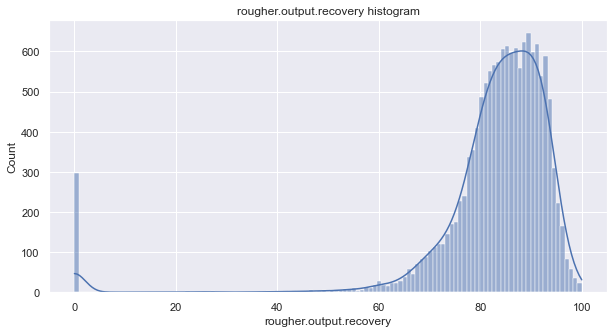

In [43]:
#ploting histogram 
sns.set(rc={"figure.figsize":(10, 5)})
p=sns.histplot(x="rougher.output.recovery", data=train_df,kde=True).set(title='rougher.output.recovery histogram')


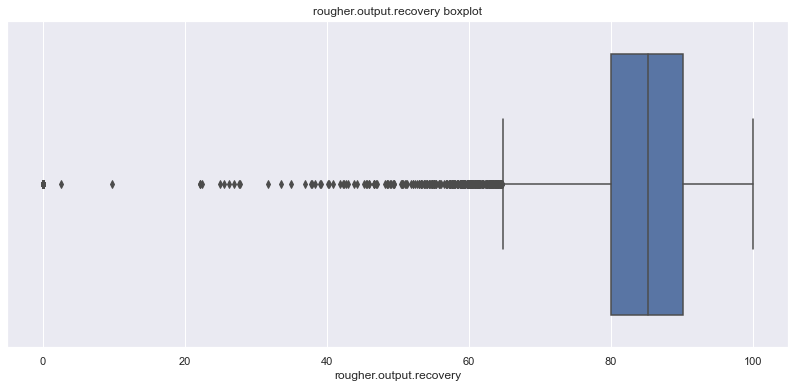

In [44]:
# Plotting box plot
sns.set(rc={"figure.figsize":(14, 6)})
b=sns.boxplot(x="rougher.output.recovery", data=train_df).set(title='rougher.output.recovery boxplot')

In [45]:
# Showing statistics
train_df['rougher.output.recovery'].describe()

count    14149.000000
mean        82.704502
std         14.479156
min          0.000000
25%         79.993067
50%         85.299462
75%         90.165021
max        100.000000
Name: rougher.output.recovery, dtype: float64

In [46]:
# Calculating outliers
q1 = np.percentile(train_df['rougher.output.recovery'], 25)
q3= np.percentile(train_df['rougher.output.recovery'], 75)
iqr = q3 - q1
uper_fence = q3 +(1.5 * iqr)
lower_fence = q1 -(1.5 * iqr)
print(f"Outliers are values smaller than {lower_fence:.2f}, and larger than {uper_fence:.2f}")

Outliers are values smaller than 64.74, and larger than 105.42


**Final recovery**

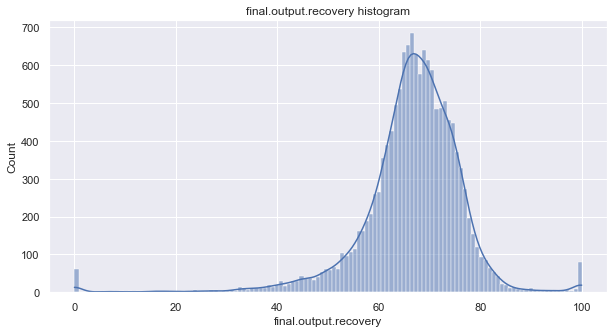

In [47]:
#ploting histogram 
sns.set(rc={"figure.figsize":(10, 5)})
p=sns.histplot(x="final.output.recovery", data=train_df,kde=True).set(title='final.output.recovery histogram')


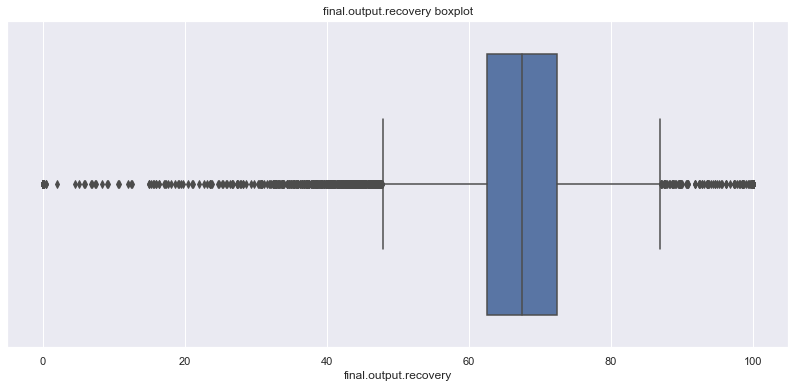

In [48]:
# Plotting box plot
sns.set(rc={"figure.figsize":(14, 6)})
b=sns.boxplot(x="final.output.recovery", data=train_df).set(title='final.output.recovery boxplot')

In [49]:
# Showing statistics
train_df['final.output.recovery'].describe()

count    14149.000000
mean        66.518832
std         10.295402
min          0.000000
25%         62.545817
50%         67.432775
75%         72.346428
max        100.000000
Name: final.output.recovery, dtype: float64

In [50]:
# Calculating outliers

q1 = np.percentile(train_df['final.output.recovery'], 25)
q3= np.percentile(train_df['final.output.recovery'], 75)
iqr = q3 - q1
uper_fence = q3 +(1.5 * iqr)
lower_fence = q1 -(1.5 * iqr)
print(f"Outliers are values smaller than {lower_fence:.2f}, and larger than {uper_fence:.2f}")

Outliers are values smaller than 47.84, and larger than 87.05


In [51]:
# creating train set without outliers
no_outliers_train = train_df[train_df['rougher.output.recovery'] > 65] 
no_outliers_train = no_outliers_train[(no_outliers_train['final.output.recovery'] > 48) & (no_outliers_train['final.output.recovery'] < 90)]

In [52]:
# creating test set without outliers
no_outliers_test = test_df.merge(source_df[['date', 'rougher.output.recovery', 'final.output.recovery']], 
                        how='left', on='date')

no_outliers_test = no_outliers_test[no_outliers_test['rougher.output.recovery'] > 65] 
no_outliers_test = no_outliers_test[(no_outliers_test['final.output.recovery'] > 48) & (no_outliers_test['final.output.recovery'] < 90)]

### summary:

* I removed the features that are missing in the test set from the train set to avoid data leakage.
* All missing data was replaced with the following data on the time-line.
* There were no duplicated rows.
* I found outliers in both target columns, they seem too much to just drop them but I and created sets without them to check the model later.


# Analyze the data

## Take note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage.

<function matplotlib.pyplot.show(close=None, block=None)>

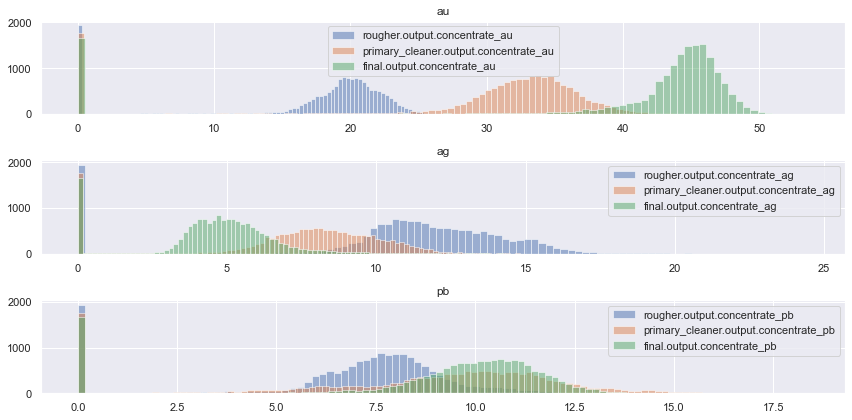

In [53]:
# Plotting metals concentrations

metals = ['au', 'ag', 'pb']
columns = ['rougher.output.concentrate', 'primary_cleaner.output.concentrate', 'final.output.concentrate']

fig = plt.figure(figsize=(12,6))
for i,metal in enumerate(metals):
    for col in columns:
        plt.subplot(3,1,i+1)
        plt.hist(train_df_raw[col+'_'+metal], bins=100,label=col+'_'+metal,alpha=.5)
    plt.title(metal)
    
    plt.legend()
    
plt.tight_layout()
plt.show

### Discussion:

* As expected Gold(`au`) witch is the target metal for purification starts in low percentage(~20%) and increasing through the process( ~45%).


* Silver(`ag`) starts high(~15%) and decreasing through the process( ~5%).


* With lead(`pb`) there is an interesting scenario, it starts low (~7.5%) than it gets higher and very scattered (3% - 15%), and finally it stables around 11%, still higher than the start. I assume that the gold purification process also purifies lead, or in other word its hard to get rid of lead in the gold purification process.   
    

## Compare the feed particle size distributions in the training set and in the test set. If the distributions vary significantly, the model evaluation will be incorrect.

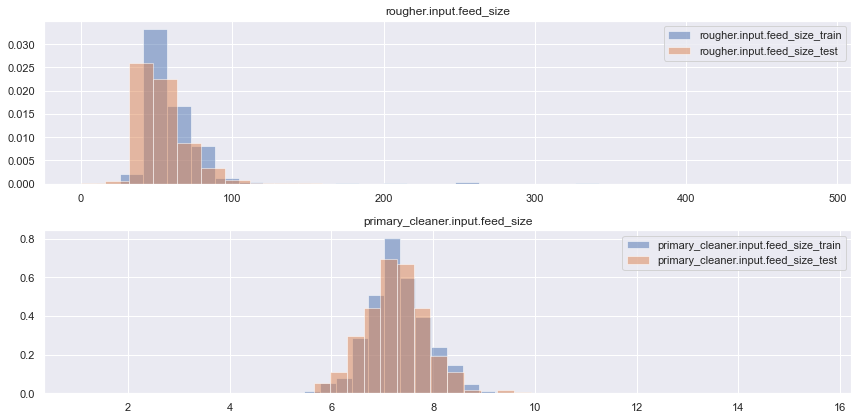

In [54]:
columns = ['rougher.input.feed_size', 'primary_cleaner.input.feed_size']

fig = plt.figure(figsize=(12,6))
for i,col in enumerate(columns):
    plt.subplot(2,1,i+1)
    plt.hist(train_df[col], bins=30, label=col+'_train', alpha=.5, density=1)
    plt.hist(test_df[col], bins=30, label=col+'_test', alpha=.5, density=1)
    plt.title(col)
    plt.legend()
    
plt.tight_layout()
plt.show()

### conclussion:
* The particles size in both sets distribute a simmilar way.

## Consider the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate. Do you notice any abnormal values in the total distribution? If you do, is it worth removing such values from both samples? Describe the findings and eliminate anomalies.

In [55]:
train_df.shape

(14149, 55)

In [56]:
# Removing anomalies from train set
metals = ['au', 'ag', 'pb']
columns = ['rougher.output.concentrate', 'primary_cleaner.output.concentrate', 'final.output.concentrate']

for i,metal in enumerate(metals):
    for col in columns:
        train_df_raw[train_df_raw[col+'_'+metal]<0.01] = np.nan

for col in ['final.output.recovery', 'rougher.output.recovery']:
    train_df[train_df[col]<0.01] = np.nan

train_df.dropna(subset=['final.output.recovery', 'rougher.output.recovery'], inplace=True)

In [57]:
train_df.shape

(13795, 55)

In [58]:
features_col = test_df.columns

In [59]:
test_df.shape

(5856, 53)

In [60]:
# Removing anomalies from test set
test_df = test_df.merge(source_df[['date', 'rougher.output.recovery', 'final.output.recovery']], 
                        how='left', on='date')

for col in ['rougher.output.recovery', 'final.output.recovery']:
    test_df[test_df[col]<0.01] = np.nan
    
test_df.dropna(subset=['rougher.output.recovery', 'final.output.recovery'], inplace=True)
    

In [61]:
test_df.shape

(5154, 55)

### conclussion:
* We had anomalies of values that are very close to 0, I got rid of them in both sets.

# Build the model

## Write a function to calculate the final sMAPE value.

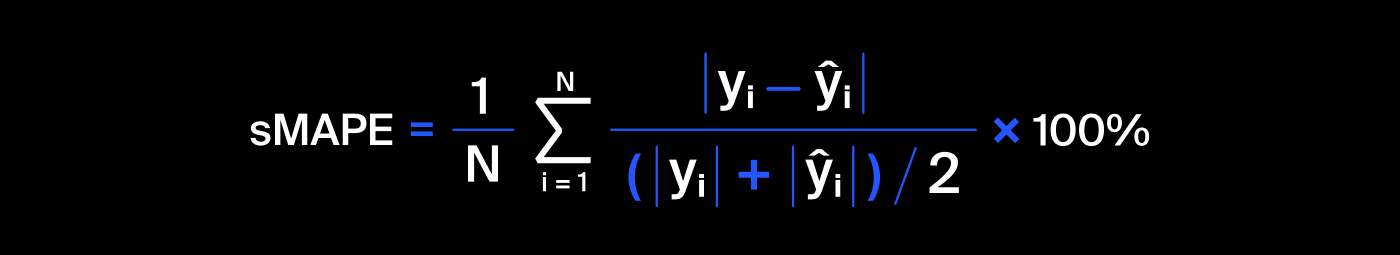

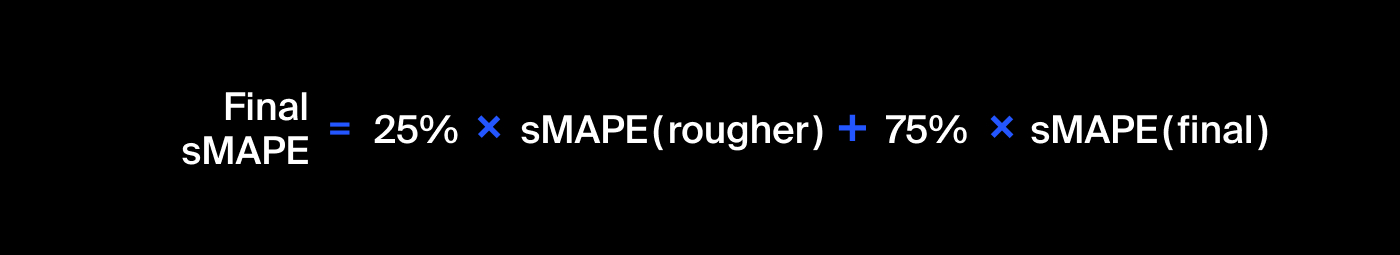

In [62]:
# creating sMAPE function (The values are already percentages)
def smape_func(y_true, y_pred):
    smape = (np.abs(y_true - y_pred)/ ((np.abs(y_true) + np.abs(y_pred))/2)).mean()
    return smape

In [63]:
def final_smape_func(y_true, y_pred):
    smape_rougher = smape_func(y_true['rougher.output.recovery'], y_pred[:,0])
    smape_final = smape_func(y_true['final.output.recovery'], y_pred[:,1])
    final_smape = (0.25*smape_rougher) + (0.75*smape_final)
    return final_smape

## Train different models. Evaluate them using cross-validation. Pick the best model and test it using the test sample. Provide findings.

**Splitting the data into features and target**

In [64]:
target = ['rougher.output.recovery', 'final.output.recovery']
features = [col for col in features_col if col != 'date']

In [65]:
features_train, features_test = train_df[features], test_df[features]
target_train, target_test = train_df[target], test_df[target]

In [66]:
# No outliers data
features_train_out, features_test_out = no_outliers_train[features], no_outliers_test[features]
target_train_out, target_test_out = no_outliers_train[target], no_outliers_test[target]

**Cross validation of decision tree and linear regression**

In [67]:
# Cross-validation function
def cross_val(model):
    smape_score = make_scorer(final_smape_func)
    scores = cross_val_score(model, features_train, target_train, cv=5, scoring=smape_score)
    final_score = scores.sum()/5
    return final_score
    #print(f"Cross validation sMAPE= {final_score}")

In [71]:
params = {'max_depth': range(1,6)}
smape_score = make_scorer(final_smape_func, greater_is_better=False)
rf = RandomForestRegressor(random_state=12345)
gs_rf = GridSearchCV(rf, param_grid=params, scoring=smape_score, cv=5)

gs_rf.fit(features_train, target_train)
print(f"best depth: {gs_rf.best_params_}")
print(f"smape score: {abs(gs_rf.best_score_)}")

best depth: {'max_depth': 3}
smape score: 0.08807145967769373


In [73]:
# Linear regresion
cross_val(LinearRegression())

0.10075774544074259

### Conclusion:
Random forest regressor with max depth of 3 is better!

### Testing the model

In [74]:
rf = RandomForestRegressor(random_state=12345, max_depth=3)
rf.fit(features_train, target_train)

RandomForestRegressor(max_depth=3, random_state=12345)

In [75]:
# Getting the model's predictions 
pred_rf = rf.predict(features_test)
pred_rf

array([[86.10446582, 70.52170423],
       [85.83161969, 70.18886461],
       [85.83161969, 70.18886461],
       ...,
       [92.18139346, 74.50690957],
       [92.18139346, 74.50690957],
       [92.18139346, 74.50690957]])

In [76]:
# Getting the model's predictions, no outliers
rf_out = RandomForestRegressor(random_state=12345, max_depth=3)
rf_out.fit(features_train, target_train)
pred_rf_out = rf_out.predict(features_test_out)
pred_rf_out

array([[86.10446582, 70.52170423],
       [85.83161969, 70.18886461],
       [85.83161969, 70.18886461],
       ...,
       [92.18139346, 74.50690957],
       [92.18139346, 74.50690957],
       [92.18139346, 74.50690957]])

In [77]:
# Final smape for test set
final_smape = final_smape_func(target_test,pred_rf)
print(f"Final smape: {final_smape:.3f}")

Final smape: 0.070


In [78]:
# Final smape for test set without outliers
final_smape_out = final_smape_func(target_test_out,pred_rf_out)
print(f"Final smape: {final_smape_out:.3f}")

Final smape: 0.063


In [79]:
# Sanity check

dummy_reg = DummyRegressor(strategy="mean")
dummy_reg.fit(features_train, target_train)

dummy_prdict = dummy_reg.predict(features_test_out)
final_smape_dummy = final_smape_func(target_test_out,dummy_prdict)

print(f"sanity scheck sMAPE score: {final_smape_dummy:.3}")

sanity scheck sMAPE score: 0.0704


**The sMAPE score of the dummy model is higher than the no outliers model, the model passed sanity check.**

# Final conclusion: 
* The symmetric mean absolute percentage error (sMAPE) for the predictions of the linear regresion model 6.3%. maybe its good enough and maybe not... It's up to the share holders to decide :)

* The model passed sanity check, the data without outliers has a better smape score.